In [112]:
import os
import numpy as np
import pandas as pd
import cv2
from datetime import *
from imu_video_synch import *
from zurich_move_data_extraction import *
from utilities import *

In [113]:
# Video side Steps
# Convert the video to MP4 for Labelbox 
# Import the metadata from the video
# Extract the exact frame start movement/end movement using Labelbox 
# From these 2 frames: get cutting time
# Trim the video at the exact timestamp -> trimmed_video
# Extract the new number of frames of the trimmed video 
# Get the new start timestamp
# save the trimmed video as MP4 for labelbox 

In [114]:
# Change participant here:
participant_id = 'S003'
path, video_path, imu_path = get_participant_paths(participant_id)
print("Video Path:", video_path)
print("IMU Path:", imu_path)

Video Path: ../CreateStudy\S003\S003.MOV
IMU Path: ../CreateStudy\S003\S003.mat


In [115]:
path

'../CreateStudy\\S003'

In [116]:
# Import the metadata from the video
metadata = extract_metadata(video_path)
number_frames, fps, recording_time, creation_time, timestamps = metadata

In [117]:
print(number_frames, fps, recording_time, creation_time, timestamps)

39651 25 1586.04 2023-08-22T14:38:24.000000Z ['2023-08-22 14:38:24.000000' '2023-08-22 14:38:24.040000'
 '2023-08-22 14:38:24.080000' ... '2023-08-22 15:04:49.920000'
 '2023-08-22 15:04:49.960000' '2023-08-22 15:04:50.000000']


In [118]:
creation_time

'2023-08-22T14:38:24.000000Z'

In [119]:
# Use this to find the frames starting/ending the recording 
read_video_frames(video_path)

In [120]:
# Extract the exact frame start movement/end movement using OpenCV  
frame_start = 2578
frame_end = 37618

In [121]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration = get_trimmed_video_timestamps(frame_start, frame_end, timestamps)

In [122]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration

(datetime.datetime(2023, 8, 22, 14, 40, 7, 120000),
 datetime.datetime(2023, 8, 22, 15, 3, 28, 720000),
 datetime.timedelta(seconds=1401, microseconds=600000))

In [123]:
start_trimming_time, end_trimming_time = get_trimming_times(frame_start, frame_end)

In [124]:
# Trim the video at the exact timestamp -> trimmed_video
trimmed_video = trim_video(video_path, start_trimming_time, end_trimming_time, path)
print(f"Trimmed video saved as: {trimmed_video}")

Trimmed video saved as: ../CreateStudy\S003\trimmed_S003.MOV


In [125]:
# Read the trimmed video
read_video_frames(trimmed_video)

In [126]:
# Convert the trimmed video to MP4 for Labelbox 
converted_trimmed_video = convert_from_mov_to_mp4(trimmed_video, path)

In [127]:
# Extract the new metadat of the trimmed video 
trimmed_number_frames,  trimmed_fps,  trimmed_recording_time, trimmed_creation_time,  trimmed_timestamps = extract_metadata(converted_trimmed_video)
print(trimmed_number_frames, trimmed_fps, trimmed_recording_time, trimmed_creation_time, trimmed_timestamps)

35040 25 1401.6 None None


In [128]:
# Create MP4 videos for Labelbox
# Filenames
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
labelbox_video_LW_filename = participant_id + '_LW.mp4'
labelbox_video_RW_filename = participant_id + '_RW.mp4'

# Paths
trimmed_video_path = os.path.join(path, trimmed_video_filename)
labelbox_video_LW_path = os.path.join(path, labelbox_video_LW_filename)
labelbox_video_RW_path = os.path.join(path, labelbox_video_RW_filename)

# Copy videos
labelbox_video_LW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_LW_path)
labelbox_video_RW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_RW_path)

Video copied: '../CreateStudy\S003\converted_trimmed_S003.MOV.mp4' -> '../CreateStudy\S003\S003_LW.mp4'
Video copied: '../CreateStudy\S003\converted_trimmed_S003.MOV.mp4' -> '../CreateStudy\S003\S003_RW.mp4'


In [129]:
# Extract the new metadat of the trimmed video 
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
trimmed_video_path = os.path.join(path, trimmed_video_filename)
number_frames_trimmed_video,  _,  _, _,  _ = extract_metadata(trimmed_video_path)
print(number_frames_trimmed_video)

35040


In [130]:
output_folder_LW = os.path.join(path, 'splitted_videos_LW')
output_folder_RW = os.path.join(path, 'splitted_videos_RW')
split_video_into_segments(labelbox_video_LW_path,output_folder_LW, trimmed_number_frames)
split_video_into_segments(labelbox_video_RW_path,output_folder_RW, trimmed_number_frames)

Segment 1 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_1.mp4
Segment 2 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_2.mp4
Segment 3 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_3.mp4
Segment 4 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_4.mp4
Segment 5 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_5.mp4
Segment 6 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_6.mp4
Segment 7 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_7.mp4
Segment 8 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_8.mp4
Segment 9 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_9.mp4
Segment 10 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_10.mp4
Segment 11 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_11.mp4
Segment 12 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_12.mp4
Segment 13 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_13.mp4
Segment 14 saved: ../CreateStudy\S003\splitted_videos_LW\S003_LW_14.mp4
Segment 15

In [131]:
# # IMU side Steps
# From the start timestamp and number of frame, extract the new IMU data
# Ensure 2 * trimmed_video_frames = number_sample_IMU
# The starting peak of acceleration should match the start of the new trimmed data 
# The end of the acceleration peak should match the end of the cut


In [132]:
# Define the sensor placements, sensor features, and dataframe features
sensor_placement = ['LW', 'chest', 'RW']
matlab_sensor_features = ['acc', 'gyro', 'quat', 'accHiG', 'magneto', 'press']
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'quat_0', 'quat_1', 'quat_2',
                   'quat_3', 'accHiG_x', 'accHiG_y', 'accHiG_z', 'magneto_x', 'magneto_y', 'magneto_z', 'press']
sensor_9DOF_features = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ',
                       'magnetoX', 'magnetoY', 'magnetoZ']
sensor_acc_features =  ['acc_x', 'acc_y', 'acc_z']


#Extract useful stuff
header = extract_header_data_from_mat_file(imu_path)
sampling_freq =get_sampling_freq(header)
time_array = extract_time_data_from_mat_file(imu_path)
recording_time = get_recording_time(time_array)
dfs = extract_sensors_data_from_mat_file(imu_path, sensor_placement, matlab_sensor_features, sensor_features)
#Usefull export to csv (for SimuLOOP script)
#export_to_csv(file_path, dfs, sensor_placement, matlab_sensor_features, sensor_features)
acc_LW = dfs['LW'][['acc_x', 'acc_y', 'acc_z']]
acc_RW = dfs['RW'][['acc_x', 'acc_y', 'acc_z']]
gyro_LW = dfs['LW'][['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = dfs['RW'][['gyro_x', 'gyro_y', 'gyro_z']]
mag_LW = dfs['LW'][['magneto_x', 'magneto_y', 'magneto_z']]
quat_sensor_LW = dfs['LW'][['quat_0', 'quat_1', 'quat_2','quat_3']]
LW_data = dfs['LW']
RW_data = dfs['RW']
chest_data = dfs['chest']

In [133]:
header

,durationStr,freq,start,startStr,stop,stopStr,tsErrorSensorIDs
0,2 6 m   2 4 s ,50.0,1.692715e+09,2 0 2 3 / 0 8 / 2 2   1 4 : 3 6 : 1 1 . 0 0 0 ,1.692717e+09,2 0 2 3 / 0 8 / 2 2   1 5 : 0 2 : 3 5 . 0 0 0 ,                


In [134]:
IMU_start_timestamp, IMU_end_timestamp = get_datetime_timestamp(header)

2023-08-22 14:36:11.000000 2023-08-22 15:02:35.000000


In [135]:
IMU_start_timestamp

datetime.datetime(2023, 8, 22, 14, 36, 11)

In [136]:
timestamps_array = create_timestamps(IMU_start_timestamp, IMU_end_timestamp, 50)

In [137]:
timestamps_array

,timestamp
0,2023-08-22 14:36:11.000
1,2023-08-22 14:36:11.020
2,2023-08-22 14:36:11.040
3,2023-08-22 14:36:11.060
4,2023-08-22 14:36:11.080
...,...
79196,2023-08-22 15:02:34.920
79197,2023-08-22 15:02:34.940
79198,2023-08-22 15:02:34.960
79199,2023-08-22 15:02:34.980


In [138]:
RW_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,1.536044,0.744542,-1.918395,43.594596,-85.329051,12.945504,0.182267,-0.681079,0.603337,0.372875,-0.528081,0.283691,-0.888367,494.416376,275.333812,-57.744958,1002.450000
1,0.923523,0.788393,-1.736670,-250.462189,-22.209605,-75.325032,0.172838,-0.690160,0.586148,0.387366,-0.482632,0.323678,-1.144636,491.497619,275.647236,-59.899745,1002.450000
2,-1.037768,0.468477,-1.661450,-205.381067,-209.599672,-61.495098,0.156014,-0.690764,0.559253,0.430856,-0.638707,0.501312,-1.238894,502.400167,274.476492,-51.850884,1002.450000
3,-0.308474,0.640534,-1.498015,47.438212,-363.558654,41.658476,0.174274,-0.660653,0.551580,0.478472,-0.754859,0.919669,-1.018211,451.004924,279.995444,-89.793680,1002.450000
4,0.296227,-0.964286,-1.787896,37.099171,-108.905451,-89.038769,0.208528,-0.646231,0.543969,0.493032,-0.720850,0.983059,-1.025672,395.465338,285.959427,-130.796059,1002.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79196,-1.812311,-1.489310,-1.041675,-92.161644,192.127067,-17.021437,-0.214451,-0.247914,-0.816988,0.474421,-1.517099,-0.385721,-0.816469,244.276730,172.954072,-49.241660,1002.820261
79197,-1.348418,-1.464786,-1.118572,6.378984,233.556507,97.664510,-0.188642,-0.274634,-0.823528,0.459130,-1.696206,-0.270787,-0.878900,241.136901,175.040667,-53.752680,1002.819930
79198,-0.760895,-1.568741,-0.955486,61.600387,200.077659,105.001107,-0.162125,-0.311767,-0.819416,0.452769,-1.431430,-0.130244,-0.901957,241.977532,174.482020,-52.544939,1002.820019
79199,-1.021353,-1.257248,-1.111067,-5.844614,74.429364,-10.074742,-0.147364,-0.325241,-0.820798,0.445907,-1.216131,-0.119228,-0.596209,241.752470,174.631587,-52.868287,1002.819995


In [139]:
# Add timestamps to raw data
LW_data = pd.concat([timestamps_array, LW_data], axis=1)
RW_data = pd.concat([timestamps_array, RW_data], axis=1)
chest_data = pd.concat([timestamps_array, chest_data], axis=1)

In [140]:
LW_data

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,2023-08-22 14:36:11.000,-0.171995,0.043672,-2.029458,-0.125476,-0.221448,-0.070587,-0.053110,0.803811,-0.242662,-0.540539,-0.675939,0.051014,-2.304556,371.399950,70.200063,-24.599899,1007.980000
1,2023-08-22 14:36:11.020,-0.156096,0.065497,-2.049284,-0.012158,-0.006702,0.062967,-0.052942,0.804687,-0.242935,-0.539128,-0.735566,0.001584,-2.286129,371.400188,70.199765,-24.600376,1007.980002
2,2023-08-22 14:36:11.040,-0.170343,0.050333,-2.044245,0.006365,-0.003840,-0.110767,-0.052786,0.805563,-0.243198,-0.537714,-0.636904,0.043786,-2.341202,371.399300,70.200875,-24.598601,1007.979994
3,2023-08-22 14:36:11.060,-0.180268,0.067054,-2.020930,-0.013487,0.106890,-0.015169,-0.052616,0.806444,-0.243480,-0.536281,-0.723847,0.048968,-2.296717,371.402605,70.196744,-24.605210,1007.980022
4,2023-08-22 14:36:11.080,-0.167050,0.045939,-2.051677,0.175385,0.183050,0.004217,-0.052454,0.807321,-0.243760,-0.534848,-0.690002,0.052930,-2.294955,371.390300,70.212125,-24.580600,1007.979919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79196,2023-08-22 15:02:34.920,0.945104,2.111587,-0.123389,79.914049,10.932344,31.120030,0.779196,0.340764,-0.522230,-0.063579,0.243090,0.770572,-0.832908,336.599993,55.799982,195.600004,1007.630000
79197,2023-08-22 15:02:34.940,1.803117,2.078193,-0.020403,-70.301772,128.702479,123.157253,0.788249,0.332937,-0.515497,-0.045241,0.237964,0.880905,-1.157781,336.600040,55.800025,195.600008,1007.630000
79198,2023-08-22 15:02:34.960,1.892498,0.980514,0.909497,-64.008324,96.146801,99.989827,0.801824,0.314891,-0.506968,-0.030093,0.307719,1.173135,-1.619402,336.599849,55.799916,195.599966,1007.630000
79199,2023-08-22 15:02:34.980,1.951895,0.712160,1.166211,31.008398,18.507283,60.817409,0.806837,0.307605,-0.504100,-0.016915,0.411372,0.736954,-1.036076,336.600564,55.800310,195.600127,1007.629999


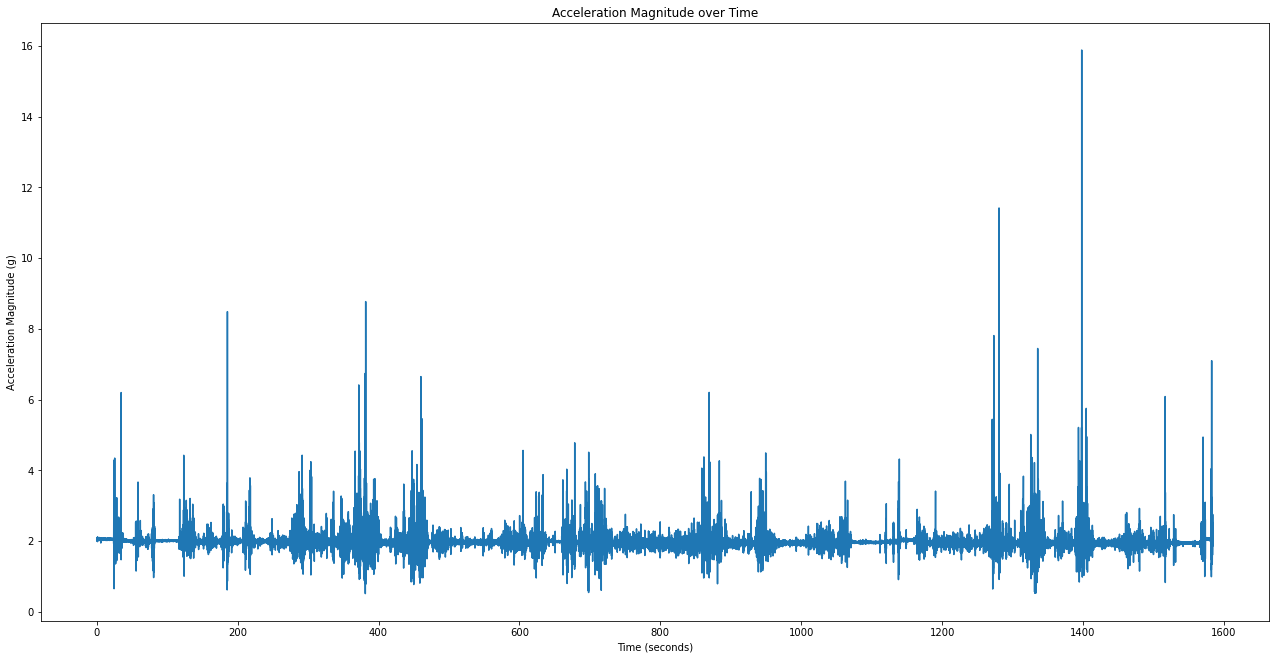

In [141]:
plot_acceleration_magnitude(LW_data,50)

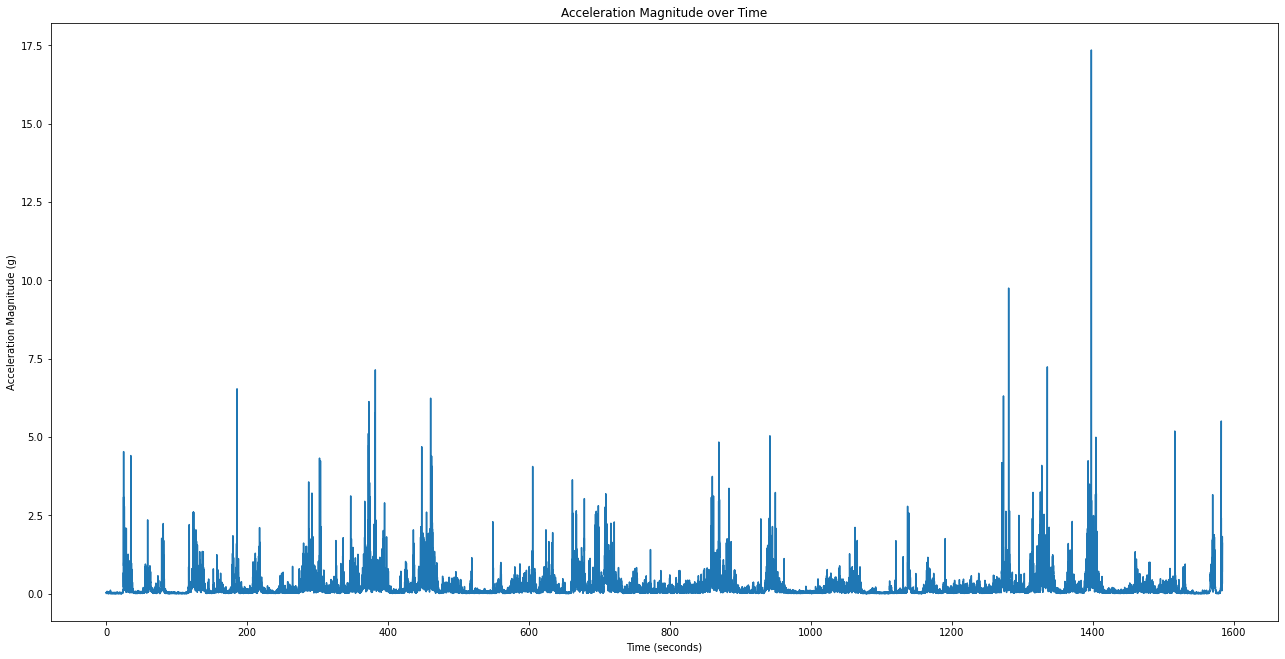

In [142]:
plot_acceleration_magnitude(filter_gravity(LW_data),50)

In [143]:
filtered_LW_data = filter_gravity(LW_data)

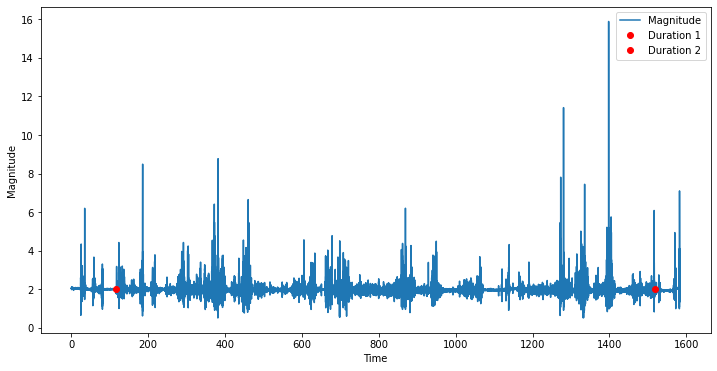

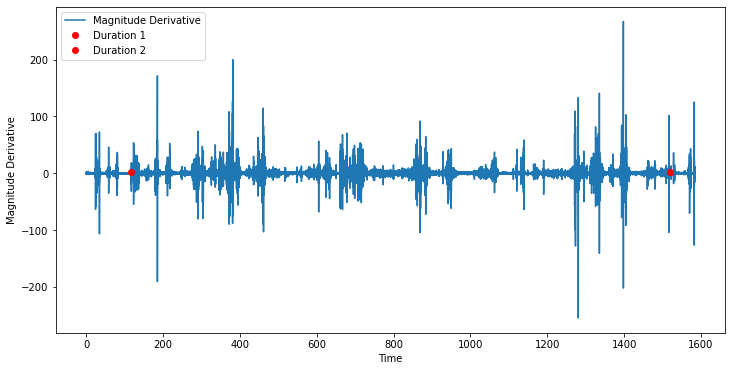

Duration 1: 116.5
Duration 2: 1518.08
Number of Samples: 70080
Number of Video Frames: 35040
Conditions ok


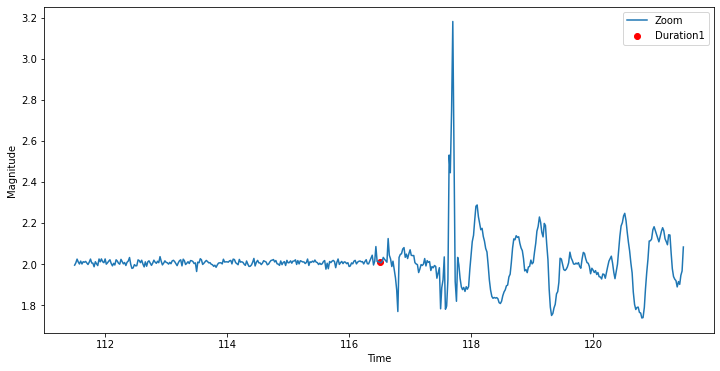

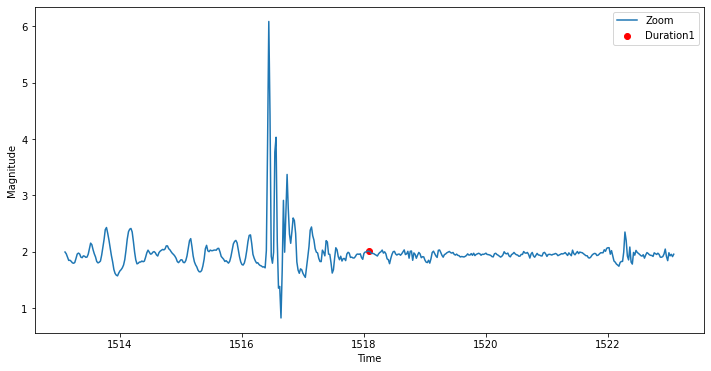

In [153]:
duration1 = 116.5
LW_data,  duration1, duration2 = plot_acceleration_with_timepoints(LW_data, duration1, trimmed_number_frames, trimmed_recording_time)
#LW_data, duration1, duration2 = plot_acceleration_with_timepoints(filtered_LW_data, duration1, trimmed_number_frames, trimmed_recording_time)

In [154]:
LW_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,0 days 00:00:00,2023-08-22 14:36:11.000,-0.171995,0.043672,-2.029458,-0.125476,-0.221448,-0.070587,-0.053110,0.803811,-0.242662,-0.540539,-0.675939,0.051014,-2.304556,371.399950,70.200063,-24.599899,1007.980000
1,0 days 00:00:00.020000,2023-08-22 14:36:11.020,-0.156096,0.065497,-2.049284,-0.012158,-0.006702,0.062967,-0.052942,0.804687,-0.242935,-0.539128,-0.735566,0.001584,-2.286129,371.400188,70.199765,-24.600376,1007.980002
2,0 days 00:00:00.040000,2023-08-22 14:36:11.040,-0.170343,0.050333,-2.044245,0.006365,-0.003840,-0.110767,-0.052786,0.805563,-0.243198,-0.537714,-0.636904,0.043786,-2.341202,371.399300,70.200875,-24.598601,1007.979994
3,0 days 00:00:00.060000,2023-08-22 14:36:11.060,-0.180268,0.067054,-2.020930,-0.013487,0.106890,-0.015169,-0.052616,0.806444,-0.243480,-0.536281,-0.723847,0.048968,-2.296717,371.402605,70.196744,-24.605210,1007.980022
4,0 days 00:00:00.080000,2023-08-22 14:36:11.080,-0.167050,0.045939,-2.051677,0.175385,0.183050,0.004217,-0.052454,0.807321,-0.243760,-0.534848,-0.690002,0.052930,-2.294955,371.390300,70.212125,-24.580600,1007.979919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79196,0 days 00:26:23.920000,2023-08-22 15:02:34.920,0.945104,2.111587,-0.123389,79.914049,10.932344,31.120030,0.779196,0.340764,-0.522230,-0.063579,0.243090,0.770572,-0.832908,336.599993,55.799982,195.600004,1007.630000
79197,0 days 00:26:23.940000,2023-08-22 15:02:34.940,1.803117,2.078193,-0.020403,-70.301772,128.702479,123.157253,0.788249,0.332937,-0.515497,-0.045241,0.237964,0.880905,-1.157781,336.600040,55.800025,195.600008,1007.630000
79198,0 days 00:26:23.960000,2023-08-22 15:02:34.960,1.892498,0.980514,0.909497,-64.008324,96.146801,99.989827,0.801824,0.314891,-0.506968,-0.030093,0.307719,1.173135,-1.619402,336.599849,55.799916,195.599966,1007.630000
79199,0 days 00:26:23.980000,2023-08-22 15:02:34.980,1.951895,0.712160,1.166211,31.008398,18.507283,60.817409,0.806837,0.307605,-0.504100,-0.016915,0.411372,0.736954,-1.036076,336.600564,55.800310,195.600127,1007.629999


In [155]:
LW_trimmed_data = trim_data(LW_data, duration1, duration2)
RW_trimmed_data = trim_data(RW_data, duration1, duration2)
chest_trimmed_data = trim_data(chest_data, duration1, duration2)

In [156]:
LW_trimmed_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
5825,0 days 00:01:56.500000,2023-08-22 14:38:07.500,-1.711437,0.336410,-0.997244,-2.706702,-2.436310,3.171761,-0.481399,0.064077,-0.862666,-0.141269,-1.419808,0.198387,-1.659046,314.397152,-99.594780,9.602848,1008.0
5826,0 days 00:01:56.519000,2023-08-22 14:38:07.520,-1.712823,0.328021,-0.990522,-2.644926,-2.879988,4.192303,-0.481678,0.063663,-0.862429,-0.141947,-1.482649,0.197661,-1.656626,314.410647,-99.619519,9.589353,1008.0
5827,0 days 00:01:56.540000,2023-08-22 14:38:07.540,-1.715785,0.330009,-0.994867,-4.837904,-2.996162,4.503073,-0.481938,0.063282,-0.862154,-0.142904,-1.487022,0.181281,-1.666075,314.360193,-99.527020,9.639807,1008.0
5828,0 days 00:01:56.560000,2023-08-22 14:38:07.560,-1.724640,0.367461,-1.009768,-6.761888,-3.790117,5.127510,-0.482235,0.063031,-0.861776,-0.144285,-1.368653,0.165562,-1.713509,314.548836,-99.872867,9.451164,1008.0
5829,0 days 00:01:56.579000,2023-08-22 14:38:07.580,-1.708379,0.374893,-1.017973,-7.171856,-4.464004,5.534424,-0.482597,0.062698,-0.861343,-0.145801,-1.474806,0.224765,-1.698465,313.814522,-98.526624,10.185478,1008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75900,0 days 00:25:18,2023-08-22 15:01:29.000,-0.792866,0.205208,1.795019,1.328611,2.146377,-8.614615,0.920129,0.102559,0.166131,-0.339477,-0.881639,0.108143,-0.122085,248.400000,-92.986534,139.200000,1007.7
75901,0 days 00:25:18.019000,2023-08-22 15:01:29.020,-0.823065,0.200760,1.806567,2.971127,6.834110,-4.308663,0.919454,0.103084,0.166899,-0.340766,-0.917234,0.078383,-0.110397,248.400000,-93.050293,139.200000,1007.7
75902,0 days 00:25:18.039000,2023-08-22 15:01:29.040,-0.756812,0.179876,1.841263,0.469658,5.094986,-4.462305,0.918972,0.103626,0.167823,-0.341448,-0.963535,0.039208,-0.156734,248.400000,-92.812171,139.200000,1007.7
75903,0 days 00:25:18.059000,2023-08-22 15:01:29.060,-0.707569,0.205940,1.873773,-4.000343,0.062109,-0.515352,0.918899,0.103278,0.168321,-0.341506,-0.939801,0.071155,-0.127029,248.400000,-93.701488,139.200000,1007.7


In [157]:
# Save everything in the correct folder
save_data(path, participant_id, frame_start, frame_end, duration1, LW_trimmed_data, RW_trimmed_data, chest_trimmed_data)

The integers have been saved to the file: '../CreateStudy\S003\S003_video_parameters.txt'
Video parameters saved.
Trimmed data for LW saved to: ../CreateStudy\S003\trimmed_LW_data.csv
Trimmed data for RW saved to: ../CreateStudy\S003\trimmed_RW_data.csv
Trimmed data for chest saved to: ../CreateStudy\S003\trimmed_chest_data.csv
